# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

In [4]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
968458,202204,토,23,39000,11250,M,45,EH,50,3.16
968459,202204,토,23,39000,11250,M,50,EH,70,3.27
968460,202204,토,23,39000,11250,M,55,EE,50,3.31
968461,202204,토,23,39000,11250,M,55,EH,50,3.28


---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [5]:
df_seoul_moving = seoul_moving.rename(columns = {'이동인구(합)' : '이동인구'})

rename inpalce = True 는 자기 자신에 변수에 저장할때 쓰임

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
mid_seoul_moving = df_seoul_moving.query('이동인구 != "*"')

In [7]:
mid_seoul_moving = mid_seoul_moving.astype({"이동인구":'float'})

In [8]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
import numpy as np
mid = np.median(mid_seoul_moving["이동인구"])

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving["이동인구"][(df_seoul_moving["이동인구"] == "*")] = mid

C:\Users\woosung\AppData\Local\Temp\ipykernel_24108\2119977325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul_moving["이동인구"][(df_seoul_moving["이동인구"] == "*")] = mid


In [9]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
df_seoul_moving = df_seoul_moving.astype({'이동인구':'float'})

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 이동유형
df_seoul_moving["이동유형"].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [ ]:
moving_seoul_moving = df_seoul_moving.groupby(['이동유형','요일'],as_index = False)\
                                     .agg(요일별이동유형수 = ('이동유형','count'))
moving_seoul_moving

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 성별
df_seoul_moving["성별"].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 요일
df_seoul_moving["요일"].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [11]:
#심야시간 00시~05시
week_seoul_moving = df_seoul_moving.query('도착시간 in [0,1,2,3,4]')\
                                   .groupby('요일',as_index = False)\
                                   .agg(심야이동인원 = ('이동인구','sum'))\
                                   .sort_values('심야이동인원',ascending = False)

week_seoul_moving

,요일,심야이동인원
5,토,5800730.94
0,금,4675204.37
4,일,4027938.49
1,목,3726660.90
2,수,3610585.58
6,화,3431543.10
3,월,2923249.85


#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [10]:
# 칼럼명에 공백 때문에 생기는 오류 해결
col_list = list(df_seoul_moving.columns)
col_list = [k.replace(" ","_") for k in col_list]
col_list 

['대상연월',
 '요일',
 '도착시간',
 '출발_시군구_코드',
 '도착_시군구_코드',
 '성별',
 '나이',
 '이동유형',
 '평균_이동_시간(분)',
 '이동인구']

In [11]:
df_seoul_moving.columns = col_list

seoul = 11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,11110,11120,11130,11140,11150,11160,11170,11180,11190,11200,11210,11220,11230,11240,11250

In [13]:
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발_시군구_코드    int64  
 4   도착_시군구_코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균_이동_시간(분)  int64  
 9   이동인구         float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
real_seoul_moving = df_seoul_moving.query('출발_시군구_코드 in [11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,11110,11120,11130,11140,11150,11160,11170,11180,11190,11200,11210,11220,11230,11240,11250]')\
                                   .query('도착_시군구_코드 in [11010,11020,11030,11040,11050,11060,11070,11080,11090,11100,11110,11120,11130,11140,11150,11160,11170,11180,11190,11200,11210,11220,11230,11240,11250]')

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [13]:
#속성타입을 바꾸어줍니당
real_seoul_moving = real_seoul_moving.astype({'출발_시군구_코드':'object'})

In [14]:
real_seoul_moving = real_seoul_moving.astype({'도착_시군구_코드':'object'})

In [15]:
# 구 코드를 구 이름으로 변환합니다
real_seoul_moving['출발_시군구_코드'] = real_seoul_moving['출발_시군구_코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'})


In [16]:
# 구 코드를 구 이름으로 변환합니다
real_seoul_moving['도착_시군구_코드'] = real_seoul_moving['도착_시군구_코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'})


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 유입
in_real_seoul_moving = real_seoul_moving.query('출발_시군구_코드 != 도착_시군구_코드')\
                                         .groupby('도착_시군구_코드')\
                                         .agg(in_moving = ('이동인구','sum'))\
                                         .sort_values('in_moving',ascending = False)
in_real_seoul_moving

,in_moving
도착_시군구_코드,
강남구,21739639.59
서초구,15564680.82
영등포구,13370788.30
중구,13281573.93
송파구,13075965.87
종로구,12693054.76
마포구,12206188.50
성북구,9938849.58
성동구,9844280.11


In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 유출
out_real_seoul_moving = real_seoul_moving.query('출발_시군구_코드 != 도착_시군구_코드')\
                                         .groupby('출발_시군구_코드')\
                                         .agg(out_moving = ('이동인구','sum'))\
                                         .sort_values('out_moving',ascending = False)
out_real_seoul_moving

,out_moving
출발_시군구_코드,
강남구,21806560.33
서초구,15498675.40
영등포구,13383296.55
중구,13313962.95
송파구,13138559.25
종로구,12750717.11
마포구,12193239.93
성북구,9966603.88
성동구,9891358.60


#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 심야시간 00시~05시
daytime_seoul_moving = real_seoul_moving.query('도착시간 != [0,1,2,3,4]')

#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [18]:
#(분)때문에 생기는 오류 제거
df_daytime_seoul_moving = daytime_seoul_moving.rename(columns = {'평균_이동_시간(분)' : '평균이동시간'})

In [20]:
df_daytime_seoul_moving.to_csv("df_daytime_seoul_moving.csv", index = False)

In [23]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df1 = df_daytime_seoul_moving.groupby('도착_시군구_코드',as_index=False)\
                             .agg(각구별평균이동시간 = ('평균이동시간','mean'))
df2 = df_daytime_seoul_moving.groupby('도착_시군구_코드',as_index=False)\
                             .agg(각구별이동시간의합 = ('평균이동시간','sum'))

In [24]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df3 = df_daytime_seoul_moving.groupby('도착_시군구_코드',as_index=False)\
                             .agg(각구별평균이동인구 = ('이동인구','mean'))
df4 = df_daytime_seoul_moving.groupby('도착_시군구_코드',as_index=False)\
                             .agg(각구별이동인구의합 = ('이동인구','sum'))

In [25]:
# 파일을 합쳐볼까요
a = pd.merge(df1,df2,how='inner', on='도착_시군구_코드')
b = pd.merge(a,df3,how='inner', on='도착_시군구_코드')
df = pd.merge(b,df4,how='inner', on='도착_시군구_코드')

In [26]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df.to_csv("df_seoul_moving.csv", index = False)

In [2]:
import pandas as pd

df_middle = pd.read_csv('df_daytime_seoul_moving.csv')

In [25]:
student_moving = df_middle.query('나이 == [10,15,20]')\
                          .groupby('출발_시군구_코드',as_index = False)\
                          .agg(각_구별_학생이동인구 = ('이동인구','sum'))
student_moving

,출발_시군구_코드,각_구별_학생이동인구
0,강남구,6331373.43
1,강동구,3023987.66
2,강북구,1699183.82
3,강서구,2680785.47
4,관악구,3122988.19
5,광진구,3361168.80
6,구로구,1635748.88
7,금천구,870464.54
8,노원구,3912398.90
9,도봉구,1384125.23


In [26]:
workman_moving = df_middle.query('나이 == [25,30,35,40,45,50]')\
                          .groupby('출발_시군구_코드',as_index = False)\
                          .agg(각_구별_직장이동인구 = ('이동인구','sum'))
workman_moving 

,출발_시군구_코드,각_구별_직장이동인구
0,강남구,24681618.50
1,강동구,8870730.44
2,강북구,4984662.97
3,강서구,10609034.88
4,관악구,9185140.94
5,광진구,8265348.59
6,구로구,7286482.58
7,금천구,4417455.18
8,노원구,8102703.08
9,도봉구,4168352.92


In [27]:
senior_moving = df_middle.query('나이 >= 65')\
                          .groupby('출발_시군구_코드',as_index = False)\
                          .agg(각_구별_고령이동인구 = ('이동인구','sum'))
senior_moving 

,출발_시군구_코드,각_구별_고령이동인구
0,강남구,6204180.61
1,강동구,4424363.32
2,강북구,3150698.20
3,강서구,3905036.90
4,관악구,3490591.52
5,광진구,2987148.31
6,구로구,2680305.50
7,금천구,1316004.44
8,노원구,4358574.26
9,도봉구,2854248.45


In [28]:
c = pd.merge(student_moving,workman_moving ,how='inner', on='출발_시군구_코드')
d = pd.merge(c,senior_moving,how='inner', on='출발_시군구_코드')

In [29]:
moving_seoul_moving = d.rename(columns = {'출발_시군구_코드' : '자치구'})

In [7]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [30]:
e = pd.merge(df_seoul_bus_station,moving_seoul_moving ,how='inner', on='자치구')
e

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각_구별_학생이동인구,각_구별_직장이동인구,각_구별_고령이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,6331373.43,24681618.50,6204180.61
1,강동구,369,21,2890053,2830506,99.161194,97.118065,3023987.66,8870730.44,4424363.32
2,강북구,413,67,4825181,4671783,133.020373,128.791504,1699183.82,4984662.97,3150698.20
3,강서구,566,49,4681083,4652828,88.119480,87.587591,2680785.47,10609034.88,3905036.90
4,관악구,466,86,7655819,7792476,154.753674,157.516040,3122988.19,9185140.94,3490591.52
5,광진구,269,41,2749448,2753411,118.352546,118.523137,3361168.80,8265348.59,2987148.31
6,구로구,486,79,4942197,4730992,119.235615,114.140076,1635748.88,7286482.58,2680305.50
7,금천구,345,58,3776658,3581930,123.098370,116.751304,870464.54,4417455.18,1316004.44
8,노원구,514,57,4353295,4292724,88.476211,87.245168,3912398.90,8102703.08,4358574.26
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,1384125.23,4168352.92,2854248.45


In [31]:
f = e.drop(['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수'], axis = 1)
f

,자치구,정류장수,노선수,각_구별_학생이동인구,각_구별_직장이동인구,각_구별_고령이동인구
0,강남구,499,91,6331373.43,24681618.50,6204180.61
1,강동구,369,21,3023987.66,8870730.44,4424363.32
2,강북구,413,67,1699183.82,4984662.97,3150698.20
3,강서구,566,49,2680785.47,10609034.88,3905036.90
4,관악구,466,86,3122988.19,9185140.94,3490591.52
5,광진구,269,41,3361168.80,8265348.59,2987148.31
6,구로구,486,79,1635748.88,7286482.58,2680305.50
7,금천구,345,58,870464.54,4417455.18,1316004.44
8,노원구,514,57,3912398.90,8102703.08,4358574.26
9,도봉구,359,46,1384125.23,4168352.92,2854248.45


In [32]:
corr_df = f.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,정류장수,노선수,각_구별_학생이동인구,각_구별_직장이동인구,각_구별_고령이동인구
정류장수,1.00,0.26,0.44,0.30,0.37
노선수,0.26,1.00,0.20,0.32,0.06
각_구별_학생이동인구,0.44,0.20,1.00,0.81,0.81
각_구별_직장이동인구,0.30,0.32,0.81,1.00,0.80
각_구별_고령이동인구,0.37,0.06,0.81,0.80,1.00


In [13]:
import scipy.stats as stats

In [28]:
stats.pearsonr(f['정류장수'],f['각_구별_학생이동인구'])

(0.4373928131824071, 0.028779347782727067)

In [29]:
stats.pearsonr(f['정류장수'],f['각_구별_직장이동인구'])

(0.29957094818837904, 0.14571727206095944)

In [30]:
stats.pearsonr(f['정류장수'],f['각_구별_고령이동인구'])

(0.36976524180727877, 0.0688701922112977)

In [31]:
stats.pearsonr(f['노선수'],f['각_구별_학생이동인구'])

(0.19735935373738417, 0.34434117864127683)

In [32]:
stats.pearsonr(f['노선수'],f['각_구별_직장이동인구'])

(0.31776067676610864, 0.12164725468188259)

In [33]:
stats.pearsonr(f['노선수'],f['각_구별_고령이동인구'])

(0.056842596804171655, 0.7872522865128264)

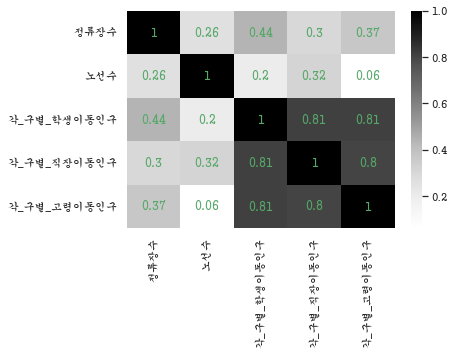

In [26]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

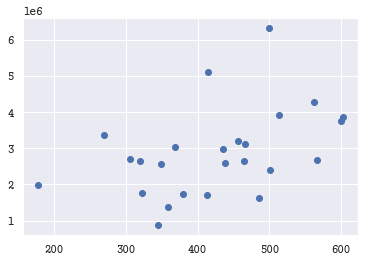

In [17]:
plt.scatter(e['정류장수'], e['각_구별_학생이동인구'])
plt.show()

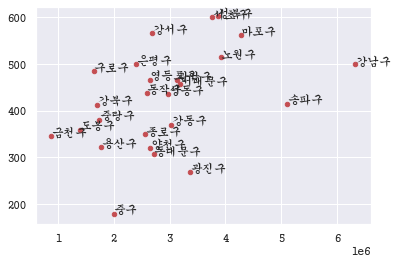

In [33]:
plt.scatter(e['각_구별_학생이동인구'],i['정류장수'], color = 'r', s = 20)

for n in range(len(e)): # 행 개수만큼 순회
    row = e.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['각_구별_학생이동인구'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

In [1]:
import pandas as pd

df_middle = pd.read_csv('df_daytime_seoul_moving.csv')

In [2]:
df_middle

,대상연월,요일,도착시간,출발_시군구_코드,도착_시군구_코드,성별,나이,이동유형,평균이동시간,이동인구
0,202204,일,5,종로구,종로구,F,10,HE,10,5.96
1,202204,일,5,종로구,종로구,F,10,WH,10,5.88
2,202204,일,5,종로구,종로구,F,15,HE,10,4.06
3,202204,일,5,종로구,종로구,F,15,EW,10,4.06
4,202204,일,5,종로구,종로구,F,15,EH,10,10.08
...,...,...,...,...,...,...,...,...,...,...
9555933,202204,토,23,강동구,강동구,M,80,WH,10,85.10
9555934,202204,토,23,강동구,강동구,M,80,EH,10,28.36
9555935,202204,토,23,강동구,강동구,M,80,EE,20,37.99
9555936,202204,토,23,강동구,강동구,M,80,HE,10,9.42


In [5]:
to_work_moving = df_middle.query('도착시간 == [5,6,8,9]')\
                          .groupby('출발_시군구_코드',as_index = False)\
                          .agg(각_구별_출근시간이동인구 = ('이동인구','sum'))
to_work_moving

,출발_시군구_코드,각_구별_출근시간이동인구
0,강남구,4395728.41
1,강동구,3660400.22
2,강북구,2190236.53
3,강서구,3677106.05
4,관악구,3502280.25
5,광진구,2799777.85
6,구로구,2523464.75
7,금천구,1360229.11
8,노원구,3420954.11
9,도봉구,1976348.80


In [6]:
to_home_moving = df_middle.query('도착시간 == [17,18,19,20,21]')\
                          .groupby('출발_시군구_코드',as_index = False)\
                          .agg(각_구별_퇴근시간이동인구 = ('이동인구','sum'))
to_home_moving

,출발_시군구_코드,각_구별_퇴근시간이동인구
0,강남구,16382827.79
1,강동구,6347817.73
2,강북구,3698241.17
3,강서구,6572036.29
4,관악구,5554401.15
5,광진구,5715939.63
6,구로구,4502287.15
7,금천구,2758840.59
8,노원구,6032930.37
9,도봉구,3084826.81


In [8]:
g = pd.merge(to_work_moving,to_home_moving ,how='inner', on='출발_시군구_코드')
g

,출발_시군구_코드,각_구별_출근시간이동인구,각_구별_퇴근시간이동인구
0,강남구,4395728.41,16382827.79
1,강동구,3660400.22,6347817.73
2,강북구,2190236.53,3698241.17
3,강서구,3677106.05,6572036.29
4,관악구,3502280.25,5554401.15
5,광진구,2799777.85,5715939.63
6,구로구,2523464.75,4502287.15
7,금천구,1360229.11,2758840.59
8,노원구,3420954.11,6032930.37
9,도봉구,1976348.80,3084826.81


In [9]:
seoul_time_moving = g.rename(columns = {'출발_시군구_코드' : '자치구'})

In [10]:
h = pd.merge(df_seoul_bus_station,seoul_time_moving ,how='inner', on='자치구')
h

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각_구별_출근시간이동인구,각_구별_퇴근시간이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,4395728.41,16382827.79
1,강동구,369,21,2890053,2830506,99.161194,97.118065,3660400.22,6347817.73
2,강북구,413,67,4825181,4671783,133.020373,128.791504,2190236.53,3698241.17
3,강서구,566,49,4681083,4652828,88.119480,87.587591,3677106.05,6572036.29
4,관악구,466,86,7655819,7792476,154.753674,157.516040,3502280.25,5554401.15
5,광진구,269,41,2749448,2753411,118.352546,118.523137,2799777.85,5715939.63
6,구로구,486,79,4942197,4730992,119.235615,114.140076,2523464.75,4502287.15
7,금천구,345,58,3776658,3581930,123.098370,116.751304,1360229.11,2758840.59
8,노원구,514,57,4353295,4292724,88.476211,87.245168,3420954.11,6032930.37
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,1976348.80,3084826.81


In [11]:
i = h.drop(['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수'], axis = 1)
i

,자치구,정류장수,노선수,각_구별_출근시간이동인구,각_구별_퇴근시간이동인구
0,강남구,499,91,4395728.41,16382827.79
1,강동구,369,21,3660400.22,6347817.73
2,강북구,413,67,2190236.53,3698241.17
3,강서구,566,49,3677106.05,6572036.29
4,관악구,466,86,3502280.25,5554401.15
5,광진구,269,41,2799777.85,5715939.63
6,구로구,486,79,2523464.75,4502287.15
7,금천구,345,58,1360229.11,2758840.59
8,노원구,514,57,3420954.11,6032930.37
9,도봉구,359,46,1976348.80,3084826.81


In [12]:
corr_df2 = i.corr()
corr_df2 = corr_df2.apply(lambda x: round(x ,2))
corr_df2

,정류장수,노선수,각_구별_출근시간이동인구,각_구별_퇴근시간이동인구
정류장수,1.00,0.26,0.53,0.28
노선수,0.26,1.00,-0.16,0.31
각_구별_출근시간이동인구,0.53,-0.16,1.00,0.63
각_구별_퇴근시간이동인구,0.28,0.31,0.63,1.00


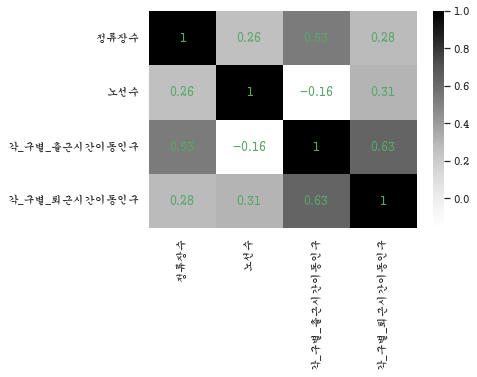

In [20]:
ax = sns.heatmap(corr_df2, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [14]:
stats.pearsonr(i['정류장수'],i['각_구별_출근시간이동인구'])

(0.5300034608091178, 0.006428994806932658)

In [15]:
stats.pearsonr(i['정류장수'],i['각_구별_퇴근시간이동인구'])

(0.2765946286605599, 0.18074741651163964)

In [16]:
stats.pearsonr(i['노선수'],i['각_구별_출근시간이동인구'])

(-0.1587967720255104, 0.4483521565417748)

In [17]:
stats.pearsonr(i['노선수'],i['각_구별_퇴근시간이동인구'])

(0.3065378845116127, 0.13612679155877752)

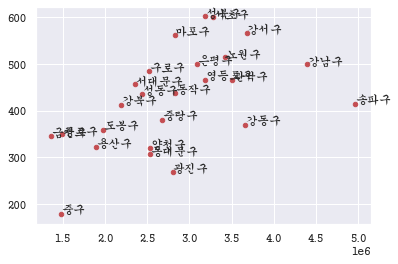

In [24]:
plt.scatter(i['각_구별_출근시간이동인구'],i['정류장수'], color = 'r', s = 20)

for n in range(len(i)): # 행 개수만큼 순회
    row = i.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['각_구별_출근시간이동인구'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [19]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="HYGungSo-Bold",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

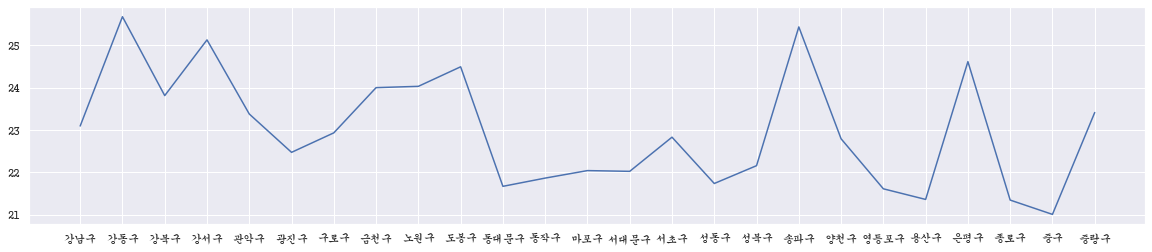

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
plt.plot('도착_시군구_코드', '각구별평균이동시간', data = df)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---